In [1]:
import json
data = json.load(open('idealista_search.txt'))

In [2]:
data['totalPages']

28

In [3]:
import pandas as pd
df = pd.json_normalize(data, record_path = ["elementList"])

In [4]:
df.describe()

,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea,parkingSpace.parkingSpacePrice
count,50.000000,5.000000e+01,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,2.0
mean,24.180000,3.089980e+05,127.44000,3.100000,1.840000,43.365543,-8.406956,2202.160000,45000.0
std,10.177386,3.330689e+05,94.95029,1.164965,0.997139,0.009480,0.009824,829.670167,0.0
min,5.000000,8.000000e+04,47.00000,0.000000,1.000000,43.352059,-8.425905,1095.000000,45000.0
25%,18.250000,1.200000e+05,74.00000,2.000000,1.000000,43.355969,-8.414372,1500.000000,45000.0
50%,24.000000,1.920000e+05,101.00000,3.000000,2.000000,43.366325,-8.405798,2018.000000,45000.0
75%,28.000000,3.990000e+05,148.00000,4.000000,2.000000,43.371410,-8.399563,2641.500000,45000.0
max,49.000000,1.900000e+06,553.00000,6.000000,5.000000,43.381691,-8.389442,3958.000000,45000.0


In [5]:
df.columns

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'priceByArea', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'topNewDevelopment', 'superTopHighlight',
       'parkingSpace.hasParkingSpace',
       'parkingSpace.isParkingSpaceIncludedInPrice', 'detailedType.typology',
       'suggestedTexts.subtitle', 'suggestedTexts.title',
       'parkingSpace.parkingSpacePrice', 'labels', 'detailedType.subTypology'],
      dtype='object')

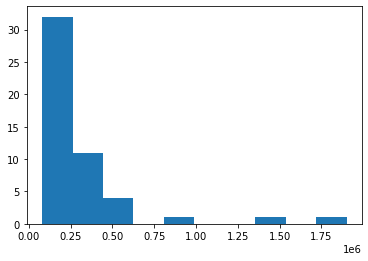

In [6]:
import matplotlib.pyplot as plt
plt.hist(df['price'])
plt.show()

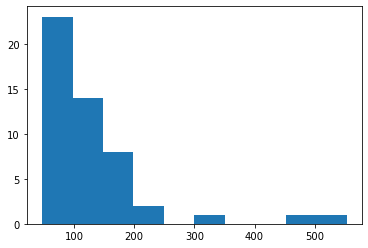

In [7]:
plt.hist(df['size'])
plt.show()

Text(0, 0.5, 'Size')

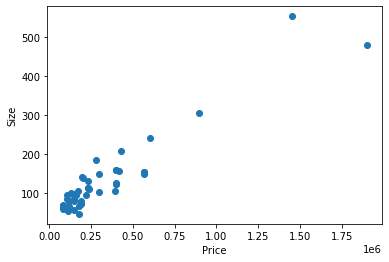

In [8]:
plt.scatter(df['price'], df['size'])
plt.xlabel('Price')
plt.ylabel('Size')

Text(0, 0.5, 'Rooms')

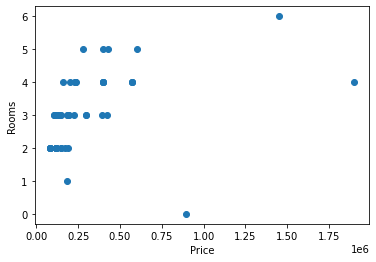

In [9]:
plt.scatter(df['price'], df['rooms'])
plt.xlabel('Price')
plt.ylabel('Rooms')

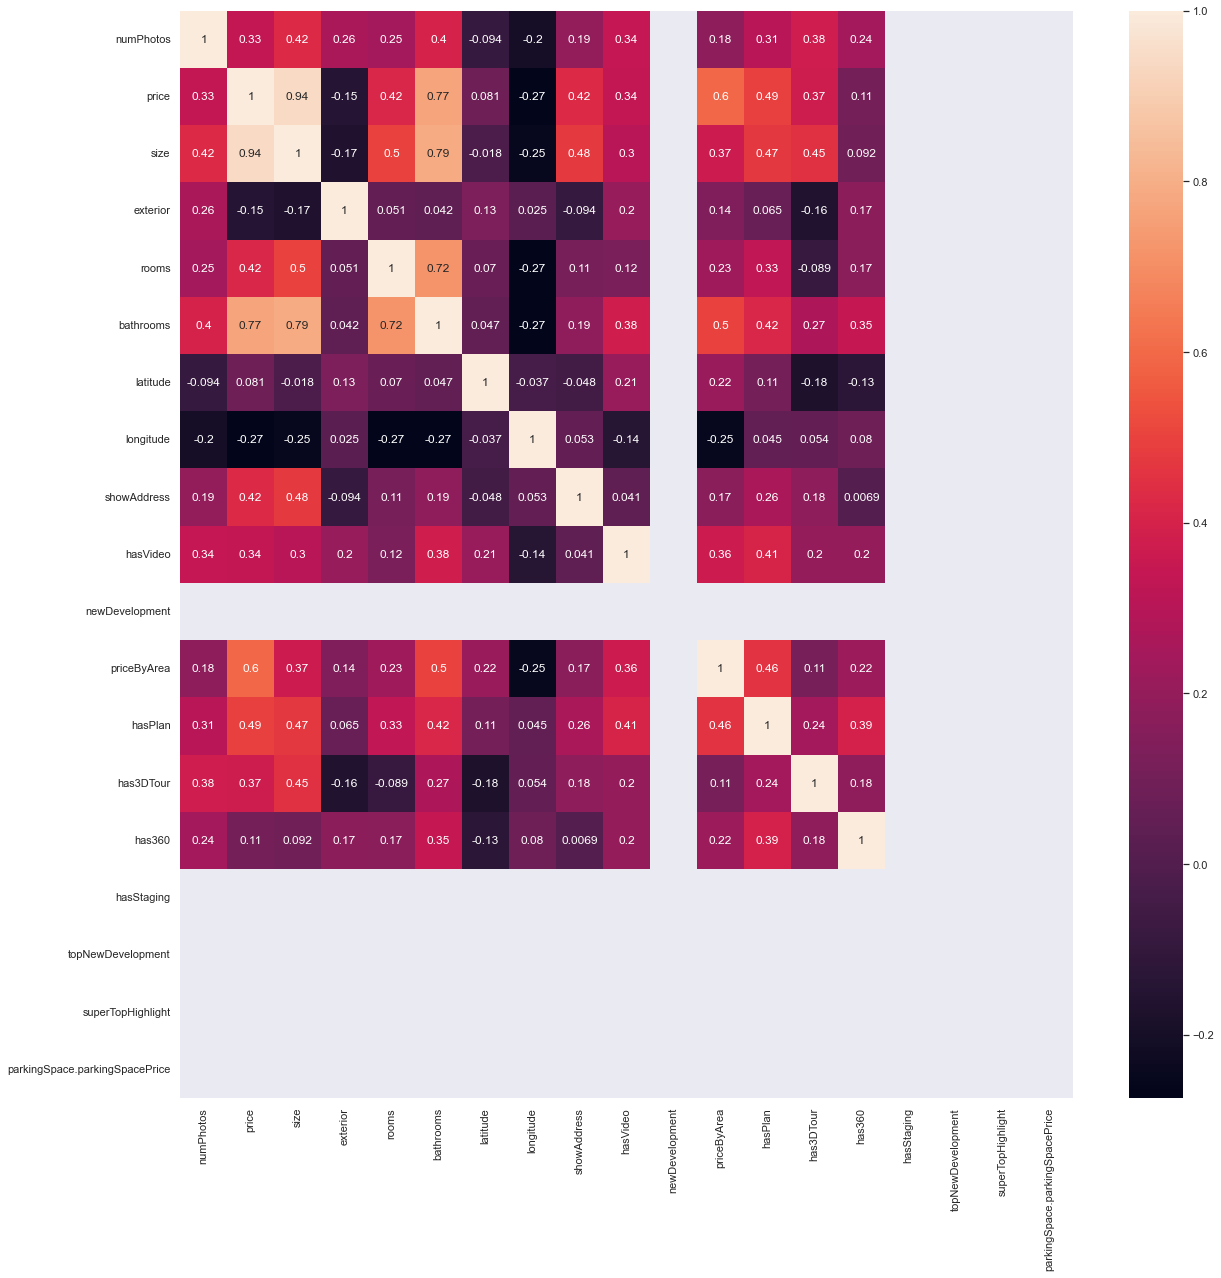

In [20]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True)
sn.set(rc={'figure.figsize':(15,15)})
plt.show()
